In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


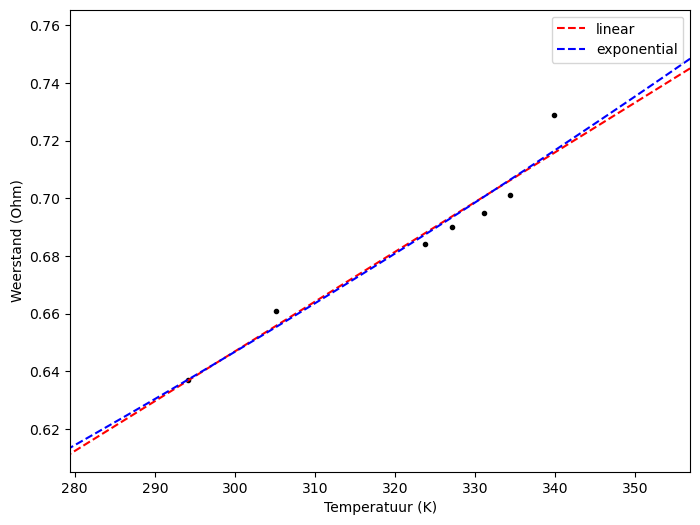

In [20]:
# Metingen aan een draad die verwarmd wordt in een potje
R = np.array([.637, .661, .729, .701, .695, .690, .684])
T = np.array([21, 32, 66.7, 61.2, 58, 53.9, 50.6]) + 273.15  # Kelvin   

def linear(T, a, b):
    return a * T + b

def exponential(T, rho_0, a):
    return rho_0 * np.exp(a * T) 

var, cov = curve_fit(linear, T, R)
var2, cov2 = curve_fit(exponential, T, R, p0=[1, 1e-3])

T_test = np.linspace(0.8*min(T), 1.2*max(T), 100)
R_fit = linear(T_test, *var)
R_fit_exp = exponential(T_test, *var2)

plt.figure(figsize=(8, 6))

plt.xlabel('Temperatuur (K)')
plt.ylabel('Weerstand (Ohm)')

plt.plot(T, R, 'k.')
plt.plot(T_test, R_fit, 'r--',label='linear')
plt.plot(T_test, R_fit_exp, 'b--',label='exponential')

plt.xlim(.95*min(T), 1.05*max(T))
plt.ylim(.95*min(R), 1.05*max(R))

plt.legend()
plt.show()